In [ ]:
import numpy as np
import time
import math

# Connect Four With Best First Minimax


### Code

In [ ]:
# Constants
ROW_COUNT = 6
COLUMN_COUNT = 7
PLAYER_1 = 1  # Max player
PLAYER_2 = -1  # Min player
EMPTY = 0

# Global node counter
nodes_explored = 0

# Create the Connect Four board
def create_board():
    return np.zeros((ROW_COUNT, COLUMN_COUNT))

# Drop a piece into the board
def drop_piece(board, row, col, piece):
    board[row][col] = piece

# Check if a column is valid for a move
def is_valid_location(board, col):
    return board[ROW_COUNT-1][col] == 0

# Get the next open row in a column
def get_next_open_row(board, col):
    for r in range(ROW_COUNT):
        if board[r][col] == 0:
            return r

# Print the board (flipped to see from the bottom)
def print_board(board):
    print(np.flip(board, 0))

# Check if the board is full
def is_full(board):
    return all(board[ROW_COUNT-1][c] != 0 for c in range(COLUMN_COUNT))

# Check if there is a winning move
def winning_move(board, piece):
    # Check horizontal locations for win
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT):
            if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
                return True

    # Check vertical locations for win
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
                return True

    # Check positively sloped diagonals
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
                return True

    # Check negatively sloped diagonals
    for c in range(COLUMN_COUNT-3):
        for r in range(3, ROW_COUNT):
            if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
                return True

    return False

# Evaluate the board
def evaluate_window(window, piece):
    score = 0
    opp_piece = PLAYER_1 if piece == PLAYER_2 else PLAYER_2

    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(EMPTY) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(EMPTY) == 2:
        score += 2

    if window.count(opp_piece) == 3 and window.count(EMPTY) == 1:
        score -= 4

    return score

def score_position(board, piece):
    score = 0

    # Score center column
    center_array = [int(i) for i in list(board[:, COLUMN_COUNT//2])]
    center_count = center_array.count(piece)
    score += center_count * 3

    # Score Horizontal
    for r in range(ROW_COUNT):
        row_array = [int(i) for i in list(board[r,:])]
        for c in range(COLUMN_COUNT-3):
            window = row_array[c:c+4]
            score += evaluate_window(window, piece)

    # Score Vertical
    for c in range(COLUMN_COUNT):
        col_array = [int(i) for i in list(board[:,c])]
        for r in range(ROW_COUNT-3):
            window = col_array[r:r+4]
            score += evaluate_window(window, piece)

    # Score positively sloped diagonal
    for r in range(ROW_COUNT-3):
        for c in range(COLUMN_COUNT-3):
            window = [board[r+i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)

    # Score negatively sloped diagonal
    for r in range(ROW_COUNT-3):
        for c in range(COLUMN_COUNT-3):
            window = [board[r+3-i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)

    return score

In [ ]:
# Minimax algorithm
def minimax(board, depth, maximizingPlayer):
    global nodes_explored
    nodes_explored += 1

    valid_locations = [c for c in range(COLUMN_COUNT) if is_valid_location(board, c)]
    is_terminal = winning_move(board, PLAYER_1) or winning_move(board, PLAYER_2) or is_full(board)

    if depth == 0 or is_terminal:
        if is_terminal:
            if winning_move(board, PLAYER_1):
                return None, 100000000000000
            elif winning_move(board, PLAYER_2):
                return None, -10000000000000
            else:  # Game is over, no more valid moves
                return None, 0
        else:  # Depth is zero
            return None, score_position(board, PLAYER_1)
    if maximizingPlayer:
        value = -np.inf
        column = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, PLAYER_1)
            new_score = minimax(b_copy, depth-1, False)[1]
            if new_score > value:
                value = new_score
                column = col
        return column, value

    else:  # Minimizing player
        value = np.inf
        column = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, PLAYER_2)
            new_score = minimax(b_copy, depth-1, True)[1]
            if new_score < value:
                value = new_score
                column = col
        return column, value

In [ ]:
# Minimax with Alpha-Beta Pruning
def minimax_alpha_beta(board, depth, alpha, beta, maximizingPlayer):
    global nodes_explored
    nodes_explored += 1

    valid_locations = [c for c in range(COLUMN_COUNT) if is_valid_location(board, c)]
    is_terminal = winning_move(board, PLAYER_1) or winning_move(board, PLAYER_2) or is_full(board)

    if depth == 0 or is_terminal:
        if is_terminal:
            if winning_move(board, PLAYER_1):
                return None, 100000000000000
            elif winning_move(board, PLAYER_2):
                return None, -10000000000000
            else:  # Game is over, no more valid moves
                return None, 0
        else:  # Depth is zero
            return None, score_position(board, PLAYER_1)
    if maximizingPlayer:
        value = -np.inf
        column = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, PLAYER_1)
            new_score = minimax_alpha_beta(b_copy, depth-1, alpha, beta, False)[1]
            if new_score > value:
                value = new_score
                column = col
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return column, value

    else:  # Minimizing player
        value = np.inf
        column = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, PLAYER_2)
            new_score = minimax_alpha_beta(b_copy, depth-1, alpha, beta, True)[1]
            if new_score < value:
                value = new_score
                column = col
            beta = min(beta, value)
            if alpha >= beta:
                break
        return column, value

In [ ]:
# Best-First Minimax Search with Depth Limit
def best_first_minimax(board, depth, alpha, beta, maximizingPlayer):
    global nodes_explored
    nodes_explored += 1

    valid_locations = [c for c in range(COLUMN_COUNT) if is_valid_location(board, c)]
    is_terminal = winning_move(board, PLAYER_1) or winning_move(board, PLAYER_2) or is_full(board)

    if depth == 0 or is_terminal:
        if is_terminal:
            if winning_move(board, PLAYER_1):
                return None, 100000000000000
            elif winning_move(board, PLAYER_2):
                return None, -10000000000000
            else:  # Game is over, no more valid moves
                return None, 0
        else:  # Depth is zero
            return None, score_position(board, PLAYER_1)

    best_value = -np.inf if maximizingPlayer else np.inf
    best_column = None
    children_scores = []

    for col in valid_locations:
        row = get_next_open_row(board, col)
        b_copy = board.copy()
        drop_piece(b_copy, row, col, PLAYER_1 if maximizingPlayer else PLAYER_2)
        score = score_position(b_copy, PLAYER_1)
        children_scores.append((col, score))

    # Sort children by score (Best First)
    children_scores.sort(key=lambda x: x[1], reverse=maximizingPlayer)

    for col, _ in children_scores:
        row = get_next_open_row(board, col)
        b_copy = board.copy()
        drop_piece(b_copy, row, col, PLAYER_1 if maximizingPlayer else PLAYER_2)
        _, value = best_first_minimax(b_copy, depth-1, alpha, beta, not maximizingPlayer)
        if maximizingPlayer:
            if value > best_value:
                best_value = value
                best_column = col
            alpha = max(alpha, best_value)
        else:
            if value < best_value:
                best_value = value
                best_column = col
            beta = min(beta, best_value)
        if alpha >= beta:
            break

    return best_column, best_value

In [ ]:
# Function to compare the algorithms
def compare_algorithms(depth):
    global nodes_explored
    board = create_board()

    # Minimax
    start_time = time.time()
    nodes_explored = 0
    col, score = minimax(board, depth, True)
    end_time = time.time()
    print(f"***********Minimax***********\n \nColumn {col}, Score {score}\nNodes explored: {nodes_explored}\nTime {end_time - start_time:.4f} seconds\n\n")

    # Alpha-Beta Pruning
    start_time = time.time()
    nodes_explored = 0
    col, score = minimax_alpha_beta(board, depth, -np.inf, np.inf, True)
    end_time = time.time()
    print(f"*****Alpha-Beta Pruning*****\n \nColumn {col}, Score {score}\nNodes explored: {nodes_explored}\nTime {end_time - start_time:.4f} seconds\n\n")

    # Best-First Minimax
    start_time = time.time()
    nodes_explored = 0
    col, score = best_first_minimax(board, depth, -np.inf, np.inf, True)
    end_time = time.time()
    print(f"*****Best-First Minimax*****\n \nColumn {col}, Score {score}\nNodes explored: {nodes_explored}\nTime {end_time - start_time:.4f} seconds\n\n")


In [ ]:
# Function to compare the algorithms
def compare_alpha_beta_bfsmm(depth):
    global nodes_explored
    board = create_board()

    # Alpha-Beta Pruning
    start_time = time.time()
    nodes_explored = 0
    col, score = minimax_alpha_beta(board, depth, -np.inf, np.inf, True)
    end_time = time.time()
    print(f"*****Alpha-Beta Pruning*****\n \nColumn {col}, Score {score}\nNodes explored: {nodes_explored}\nTime {end_time - start_time:.4f} seconds\n\n")

    # Best-First Minimax
    start_time = time.time()
    nodes_explored = 0
    col, score = best_first_minimax(board, depth, -np.inf, np.inf, True)
    end_time = time.time()
    print(f"*****Best-First Minimax*****\n \nColumn {col}, Score {score}\nNodes explored: {nodes_explored}\nTime {end_time - start_time:.4f} seconds\n\n")

### Results

In [ ]:
compare_algorithms(4)

***********Minimax***********
 
Column 3, Score 6
Nodes explored: 2801
Time 0.6758 seconds


*****Alpha-Beta Pruning*****
 
Column 3, Score 6
Nodes explored: 419
Time 0.0942 seconds


*****Best-First Minimax*****
 
Column 3, Score 6
Nodes explored: 201
Time 0.1592 seconds




In [ ]:
compare_algorithms(5)

***********Minimax***********
 
Column 3, Score 12
Nodes explored: 19608
Time 5.8045 seconds


*****Alpha-Beta Pruning*****
 
Column 3, Score 12
Nodes explored: 2988
Time 0.6460 seconds


*****Best-First Minimax*****
 
Column 3, Score 12
Nodes explored: 690
Time 0.4188 seconds




In [ ]:
compare_algorithms(6)

***********Minimax***********
 
Column 3, Score 9
Nodes explored: 137257
Time 39.3778 seconds


*****Alpha-Beta Pruning*****
 
Column 3, Score 9
Nodes explored: 9624
Time 2.0168 seconds


*****Best-First Minimax*****
 
Column 3, Score 9
Nodes explored: 1710
Time 1.4038 seconds




In [ ]:
compare_algorithms(7)

***********Minimax***********
 
Column 3, Score 15
Nodes explored: 960793
Time 258.0052 seconds


*****Alpha-Beta Pruning*****
 
Column 3, Score 15
Nodes explored: 46345
Time 11.3547 seconds


*****Best-First Minimax*****
 
Column 3, Score 15
Nodes explored: 7755
Time 5.0412 seconds




In [ ]:
compare_algorithms(8)

***********Minimax***********
 
Column 3, Score 12
Nodes explored: 6634027
Time 1708.7189 seconds


*****Alpha-Beta Pruning*****
 
Column 3, Score 12
Nodes explored: 149614
Time 33.5958 seconds


*****Best-First Minimax*****
 
Column 3, Score 12
Nodes explored: 12585
Time 11.1994 seconds




In [ ]:
compare_algorithms(9)

***********Minimax***********
 
Column 3, Score 18
Nodes explored: 46028599
Time 11806.8168 seconds


*****Alpha-Beta Pruning*****
 
Column 3, Score 18
Nodes explored: 726793
Time 169.8235 seconds


*****Best-First Minimax*****
 
Column 3, Score 18
Nodes explored: 56207
Time 38.9424 seconds




In [ ]:
compare_alpha_beta_bfsmm(10)

*****Alpha-Beta Pruning*****
 
Column 3, Score 15
Nodes explored: 1917360
Time 438.3068 seconds


*****Best-First Minimax*****
 
Column 3, Score 15
Nodes explored: 85945
Time 80.9725 seconds




In [ ]:
compare_alpha_beta_bfsmm(11)

*****Alpha-Beta Pruning*****
 
Column 3, Score 21
Nodes explored: 10968512
Time 2612.3732 seconds


*****Best-First Minimax*****
 
Column 3, Score 21
Nodes explored: 398191
Time 279.0024 seconds




In [ ]:
compare_alpha_beta_bfsmm(12)

*****Alpha-Beta Pruning*****
 
Column 3, Score 14
Nodes explored: 31849428
Time 7129.1818 seconds


*****Best-First Minimax*****
 
Column 3, Score 14
Nodes explored: 975894
Time 913.4687 seconds




### Graphs

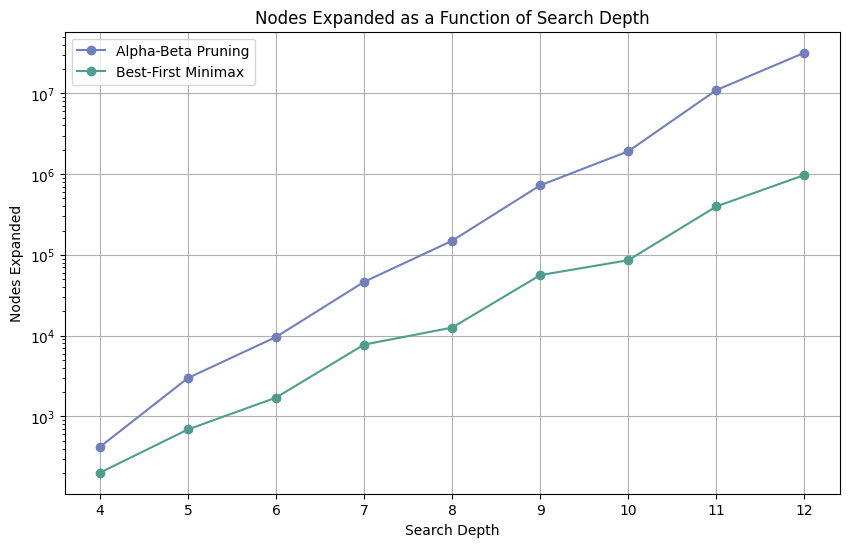

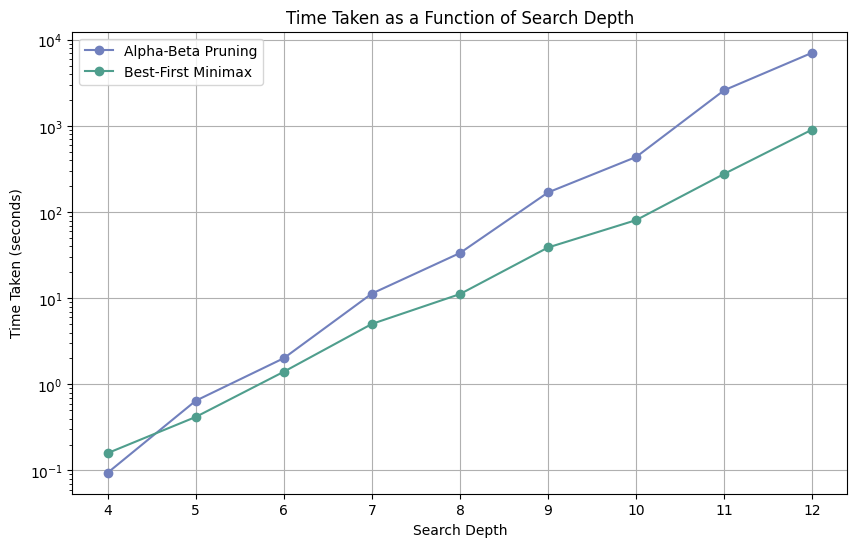

In [ ]:
import matplotlib.pyplot as plt

# Data for the depths
depths = [4, 5, 6, 7, 8, 9, 10, 11, 12]

# Data for Alpha-Beta Pruning
alpha_beta_nodes = [419, 2988, 9624, 46345, 149614, 726793, 1917360, 10968512, 31849428]
alpha_beta_time = [0.0942, 0.6460, 2.0168, 11.3547, 33.5958, 169.8235, 438.3068, 2612.3732, 7129.1818]

# Data for Best-First Minimax
best_first_nodes = [201, 690, 1710, 7755, 12585, 56207, 85945, 398191, 975894]
best_first_time = [0.1592, 0.4188, 1.4038, 5.0412, 11.1994, 38.9424, 80.9725, 279.0024, 913.4687]

# Plotting Nodes Expanded vs. Depth
plt.figure(figsize=(10, 6))
plt.plot(depths, alpha_beta_nodes, 'o-', label='Alpha-Beta Pruning', color='#7180bd')
plt.plot(depths, best_first_nodes, 'o-', label='Best-First Minimax', color='#4f9e8d')

plt.yscale('log')  # Log scale for nodes
plt.xlabel('Search Depth')
plt.ylabel('Nodes Expanded')
plt.title('Nodes Expanded as a Function of Search Depth')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Time Taken vs. Depth
plt.figure(figsize=(10, 6))
plt.plot(depths, alpha_beta_time, 'o-', label='Alpha-Beta Pruning', color='#7180bd')
plt.plot(depths, best_first_time, 'o-', label='Best-First Minimax', color='#4f9e8d')

plt.yscale('log')  # Log scale for time
plt.xlabel('Search Depth')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken as a Function of Search Depth')
plt.legend()
plt.grid(True)
plt.show()



# Old

## Tic-Tac-Toe

In [ ]:
# Constants
PLAYER_X = "X"
PLAYER_O = "O"
EMPTY = " "
NODES_EXPANDED_MM = 0
NODES_EXPANDED_AB = 0

# Tic-Tac-Toe board
def create_board():
    return [EMPTY] * 9

def print_board(board):
    print(f"{board[0]} | {board[1]} | {board[2]}")
    print("--+---+--")
    print(f"{board[3]} | {board[4]} | {board[5]}")
    print("--+---+--")
    print(f"{board[6]} | {board[7]} | {board[8]}")

def is_winner(board, player):
    winning_combinations = [
        (0, 1, 2), (3, 4, 5), (6, 7, 8),  # Rows
        (0, 3, 6), (1, 4, 7), (2, 5, 8),  # Columns
        (0, 4, 8), (2, 4, 6)              # Diagonals
    ]
    for combo in winning_combinations:
        if all(board[i] == player for i in combo):
            return True
    return False

def is_full(board):
    return EMPTY not in board

def evaluate(board):
    if is_winner(board, PLAYER_X):
        return 1
    elif is_winner(board, PLAYER_O):
        return -1
    else:
        return 0

In [ ]:
# Regular Minimax (explores entire tree)
def minimax(board, depth, is_maximizing):
    global NODES_EXPANDED_MM
    NODES_EXPANDED_MM += 1

    score = evaluate(board)
    if score == 1 or score == -1 or is_full(board):
        return score

    if is_maximizing:
        best_value = -float('inf')
        best_move = None
        for i in range(9):
            if board[i] == EMPTY:
                board[i] = PLAYER_X
                value = minimax(board, depth + 1, False)
                board[i] = EMPTY
                if value > best_value:
                    best_value = value
                    best_move = i
        if depth == 0:
            return best_move
        return best_value
    else:
        best_value = float('inf')
        best_move = None
        for i in range(9):
            if board[i] == EMPTY:
                board[i] = PLAYER_O
                value = minimax(board, depth + 1, True)
                board[i] = EMPTY
                if value < best_value:
                    best_value = value
                    best_move = i
        if depth == 0:
            return best_move
        return best_value

In [ ]:
# Alpha-Beta pruning
def alpha_beta(board, depth, alpha, beta, is_maximizing):
    global NODES_EXPANDED_AB
    NODES_EXPANDED_AB += 1

    score = evaluate(board)
    if score == 1 or score == -1 or is_full(board):
        return score

    best_value = -float('inf') if is_maximizing else float('inf')
    best_move = None

    for i in range(9):
        if board[i] == EMPTY:
            board[i] = PLAYER_X if is_maximizing else PLAYER_O
            value = alpha_beta(board, depth + 1, alpha, beta, not is_maximizing)
            board[i] = EMPTY

            if is_maximizing:
                if value > best_value:
                    best_value = value
                    best_move = i
                alpha = max(alpha, best_value)
            else:
                if value < best_value:
                    best_value = value
                    best_move = i
                beta = min(beta, best_value)

            if beta <= alpha:
                break

    if depth == 0:
        return best_move  # Return the best move for the initial call
    return best_value

In [ ]:

# Comparison function
def compare_algorithms():
    board = create_board()

    # Regular Minimax
    start_time_mm = time.time()
    best_move_mm = minimax(board, 0, True)
    end_time_mm = time.time()

    # Alpha-Beta
    start_time_ab = time.time()
    best_move_ab = alpha_beta(board, 0, -float('inf'), float('inf'), True)
    end_time_ab = time.time()

    print("Regular Minimax:")
    print(f"Time taken: {end_time_mm - start_time_mm:.6f} seconds")
    print(f"Nodes expanded: {NODES_EXPANDED_MM}")
    print(f"Best Move: {best_move_mm}")

    print("\nAlpha-Beta Pruning:")
    print(f"Time taken: {end_time_ab - start_time_ab:.6f} seconds")
    print(f"Nodes expanded: {NODES_EXPANDED_AB}")
    print(f"Best Move: {best_move_ab}")

In [ ]:
# Run the comparison
compare_algorithms()

Regular Minimax:
Time taken: 4.924145 seconds
Nodes expanded: 549946
Best Move: 0

Alpha-Beta Pruning:
Time taken: 0.172407 seconds
Nodes expanded: 18297
Best Move: 0


## Connect Four

### Code

In [ ]:
# Constants
ROW_COUNT = 6
COLUMN_COUNT = 7
PLAYER_1 = 1  # Max player
PLAYER_2 = -1  # Min player
EMPTY = 0

# Create the Connect Four board
def create_board():
    return np.zeros((ROW_COUNT, COLUMN_COUNT))

# Drop a piece into the board
def drop_piece(board, row, col, piece):
    board[row][col] = piece

# Check if a column is valid for a move
def is_valid_location(board, col):
    return board[ROW_COUNT-1][col] == 0

# Get the next open row in a column
def get_next_open_row(board, col):
    for r in range(ROW_COUNT):
        if board[r][col] == 0:
            return r

# Print the board (flipped to see from the bottom)
def print_board(board):
    print(np.flip(board, 0))

# Check if the board is full
def is_full(board):
    return all(board[ROW_COUNT-1][c] != 0 for c in range(COLUMN_COUNT))

# Check if there is a winning move
def winning_move(board, piece):
    # Check horizontal locations for win
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT):
            if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
                return True

    # Check vertical locations for win
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
                return True

    # Check positively sloped diagonals
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
                return True

    # Check negatively sloped diagonals
    for c in range(COLUMN_COUNT-3):
        for r in range(3, ROW_COUNT):
            if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
                return True

    return False

# Evaluate the board
def evaluate_window(window, piece):
    score = 0
    opp_piece = PLAYER_1 if piece == PLAYER_2 else PLAYER_2

    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(EMPTY) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(EMPTY) == 2:
        score += 2

    if window.count(opp_piece) == 3 and window.count(EMPTY) == 1:
        score -= 4

    return score

def score_position(board, piece):
    score = 0

    # Score center column
    center_array = [int(i) for i in list(board[:, COLUMN_COUNT//2])]
    center_count = center_array.count(piece)
    score += center_count * 3

    # Score Horizontal
    for r in range(ROW_COUNT):
        row_array = [int(i) for i in list(board[r,:])]
        for c in range(COLUMN_COUNT-3):
            window = row_array[c:c+4]
            score += evaluate_window(window, piece)

    # Score Vertical
    for c in range(COLUMN_COUNT):
        col_array = [int(i) for i in list(board[:,c])]
        for r in range(ROW_COUNT-3):
            window = col_array[r:r+4]
            score += evaluate_window(window, piece)

    # Score positively sloped diagonal
    for r in range(ROW_COUNT-3):
        for c in range(COLUMN_COUNT-3):
            window = [board[r+i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)

    # Score negatively sloped diagonal
    for r in range(ROW_COUNT-3):
        for c in range(COLUMN_COUNT-3):
            window = [board[r+3-i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)

    return score

In [ ]:
# Minimax algorithm
def minimax(board, depth, maximizingPlayer):
    global NODES_EXPANDED_MM
    NODES_EXPANDED_MM += 1

    valid_locations = [c for c in range(COLUMN_COUNT) if is_valid_location(board, c)]
    is_terminal = winning_move(board, PLAYER_1) or winning_move(board, PLAYER_2) or is_full(board)

    if depth == 0 or is_terminal:
        if is_terminal:
            if winning_move(board, PLAYER_1):
                return (None, 100000000000000)
            elif winning_move(board, PLAYER_2):
                return (None, -10000000000000)
            else: # Game is over, no more valid moves
                return (None, 0)
        else: # Depth is zero
            return (None, score_position(board, PLAYER_1))

    if maximizingPlayer:
        value = -math.inf
        best_col = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, PLAYER_1)
            new_score = minimax(b_copy, depth-1, False)[1]
            if new_score > value:
                value = new_score
                best_col = col
        return best_col, value

    else:  # Minimizing player
        value = math.inf
        best_col = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, PLAYER_2)
            new_score = minimax(b_copy, depth-1, True)[1]
            if new_score < value:
                value = new_score
                best_col = col
        return best_col, value

In [ ]:
# Alpha-Beta pruning
def alpha_beta(board, depth, alpha, beta, maximizingPlayer):
    global NODES_EXPANDED_AB
    NODES_EXPANDED_AB += 1

    valid_locations = [c for c in range(COLUMN_COUNT) if is_valid_location(board, c)]
    is_terminal = winning_move(board, PLAYER_1) or winning_move(board, PLAYER_2) or is_full(board)

    if depth == 0 or is_terminal:
        if is_terminal:
            if winning_move(board, PLAYER_1):
                return (None, 100000000000000)
            elif winning_move(board, PLAYER_2):
                return (None, -10000000000000)
            else:  # Game is over, no more valid moves
                return (None, 0)
        else:  # Depth is zero
            return (None, score_position(board, PLAYER_1))

    if maximizingPlayer:
        value = -math.inf
        best_col = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, PLAYER_1)
            new_score = alpha_beta(b_copy, depth-1, alpha, beta, False)[1]
            if new_score > value:
                value = new_score
                best_col = col
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return best_col, value

    else:  # Minimizing player
        value = math.inf
        best_col = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, PLAYER_2)
            new_score = alpha_beta(b_copy, depth-1, alpha, beta, True)[1]
            if new_score < value:
                value = new_score
                best_col = col
            beta = min(beta, value)
            if alpha >= beta:
                break
        return best_col, value

In [ ]:
# Comparison function
def compare_algorithms(depth):
    board = create_board()

    # Run Minimax
    global NODES_EXPANDED_MM
    NODES_EXPANDED_MM = 0
    start_time_mm = time.time()
    best_move_mm, minimax_score = minimax(board, depth, True)
    end_time_mm = time.time()

    # Run Alpha-Beta Pruning
    global NODES_EXPANDED_AB
    NODES_EXPANDED_AB = 0
    start_time_ab = time.time()
    best_move_ab, alphabeta_score = alpha_beta(board, depth, -math.inf, math.inf, True)
    end_time_ab = time.time()

    print("Minimax:")
    print(f"Best column: {best_move_mm}")
    print(f"Score: {minimax_score}")
    print(f"Time taken: {end_time_mm - start_time_mm:.6f} seconds")
    print(f"Nodes expanded: {NODES_EXPANDED_MM}")

    print("\nAlpha-Beta Pruning:")
    print(f"Best column: {best_move_ab}")
    print(f"Score: {alphabeta_score}")
    print(f"Time taken: {end_time_ab - start_time_ab:.6f} seconds")
    print(f"Nodes expanded: {NODES_EXPANDED_AB}")

### Results

In [ ]:
# Run the comparison
compare_algorithms(4)

Minimax:
Best column: 3
Score: 6
Time taken: 0.677690 seconds
Nodes expanded: 2801

Alpha-Beta Pruning:
Best column: 3
Score: 6
Time taken: 0.092911 seconds
Nodes expanded: 419


In [ ]:
compare_algorithms(5)

Minimax:
Best column: 3
Score: 12
Time taken: 5.783521 seconds
Nodes expanded: 19608

Alpha-Beta Pruning:
Best column: 3
Score: 12
Time taken: 0.683147 seconds
Nodes expanded: 2988


In [ ]:
compare_algorithms(6)

Minimax:
Best column: 3
Score: 9
Time taken: 35.674448 seconds
Nodes expanded: 137257

Alpha-Beta Pruning:
Best column: 3
Score: 9
Time taken: 2.067276 seconds
Nodes expanded: 9624


In [ ]:
compare_algorithms(7)

Minimax:
Best column: 3
Score: 15
Time taken: 247.833788 seconds
Nodes expanded: 960793

Alpha-Beta Pruning:
Best column: 3
Score: 15
Time taken: 11.114266 seconds
Nodes expanded: 46345


In [ ]:
compare_algorithms(8)

Minimax:
Best column: 3
Score: 12
Time taken: 1734.089763 seconds
Nodes expanded: 6634027

Alpha-Beta Pruning:
Best column: 3
Score: 12
Time taken: 35.245733 seconds
Nodes expanded: 149614
